# Neural Network From Scratch

This notebook can help you to understand how to build neural network from scratch.

Our neural network would have three layers:
1. Input layer
2. Hidden layer with 3 neurons
3. output layer

All the layers and their parameters are hardcoded, which can be viewed as limitation, but for illustration purposes it's the ideal set up. The limitations for the network are following: 
1. We have predetermined input size. In our case it's two features, so input size is 2
2. We have one hidden layer has 3 neurons, we cannot add more layers to the network
3. We have predetermined output size, because we a working on regression problem

It is possible to change every hardcoded parameters manually, so I encourage you to play with the code, change parts, optimize it.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import california_housing

## Data

California housing dataset

In [2]:
housing_data = california_housing.fetch_california_housing()
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

### Scaling

In [3]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['MedInc','AveRooms','Target']])

### Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
                            
    df_scaled[:10000, :2], # Features
    df_scaled[:10000, 2:], # Target
    test_size=0.33, 
    random_state=42

)

## 1. Simple Neural Network

In [5]:
class SimpleNeuralNetwork:
    
    def __init__(self): 
        
        # Initial Weights. I name each weights for illustration purposes
        self.w1, \
        self.w2, \
        self.w3, \
        self.w4, \
        self.w5, \
        self.w6, \
        self.w7, \
        self.w8, \
        self.w9 = np.random.rand(9)

        # Initial Biases. I name each bias for illustration purposes
        self.b_n1, \
        self.b_n2, \
        self.b_n3, \
        self.b_y_hat = np.random.rand(4) 

    def sigmoid(self, x): return 1 / (1 + np.e**-x)
    def sigmoid_der(self, x): return self.sigmoid(x) * (1 - self.sigmoid(x))

    def feedforward(self, x):

        # x[0], x[1] - our features
        # n* - neurons in the hidden layer, y_hat - predicted value
        self.n1 =    self.sigmoid(x[0]*self.w1 + x[1]*self.w2 + self.b_n1)
        self.n2 =    self.sigmoid(x[0]*self.w3 + x[1]*self.w4 + self.b_n2)
        self.n3 =    self.sigmoid(x[0]*self.w5 + x[1]*self.w6 + self.b_n3)

        self.y_hat = self.sigmoid(self.n1*self.w7 + self.n2*self.w8 + self.n3*self.w9 + self.b_y_hat)

    def backpropagation(self, x, y):

        # We calculate some values here to use them later
        y_hat_der = (-2 * (y-self.y_hat) * self.sigmoid_der(self.y_hat))
        z_w7_der = self.w7 * self.sigmoid_der(self.n1)
        z_w8_der = self.w8 * self.sigmoid_der(self.n2)
        z_w9_der = self.w9 * self.sigmoid_der(self.n3)

        # Biases
        self.b_n1    -= self.lr * y_hat_der * z_w7_der
        self.b_n2    -= self.lr * y_hat_der * z_w8_der
        self.b_n3    -= self.lr * y_hat_der * z_w9_der
        self.b_y_hat -= self.lr * y_hat_der

        # Weights
        self.w7 -= self.lr * y_hat_der * self.n1
        self.w8 -= self.lr * y_hat_der * self.n2
        self.w9 -= self.lr * y_hat_der * self.n3
        
        self.w1 -= self.lr * y_hat_der * z_w7_der * x[0]
        self.w2 -= self.lr * y_hat_der * z_w7_der * x[1]
        self.w3 -= self.lr * y_hat_der * z_w8_der * x[0]
        self.w4 -= self.lr * y_hat_der * z_w8_der * x[1]
        self.w5 -= self.lr * y_hat_der * z_w9_der * x[0]
        self.w6 -= self.lr * y_hat_der * z_w9_der * x[1]
        
    def fit(self, X, y, epoch=10, lr=0.01):

        mse_list = []
        self.lr = lr

        for i in range(epoch):

            mse = mean_squared_error(y, self.predict(X))
            mse_list.append(mse)
            print('Epoch: {} / {}, MSE: {}'.format(i+1, epoch, round(mse, 4)), end='\r')

            for j in range(len(X)):

                self.feedforward(X[j])
                self.backpropagation(X[j], y[j][0]) 

        return mse_list

    def predict(self, X):

        result = []

        for x in X:
            self.feedforward(x)
            result.append(self.y_hat)

        return result

In [6]:
model = SimpleNeuralNetwork()

In [7]:
history = model.fit(X_train, y_train, epoch=100, lr=0.05)

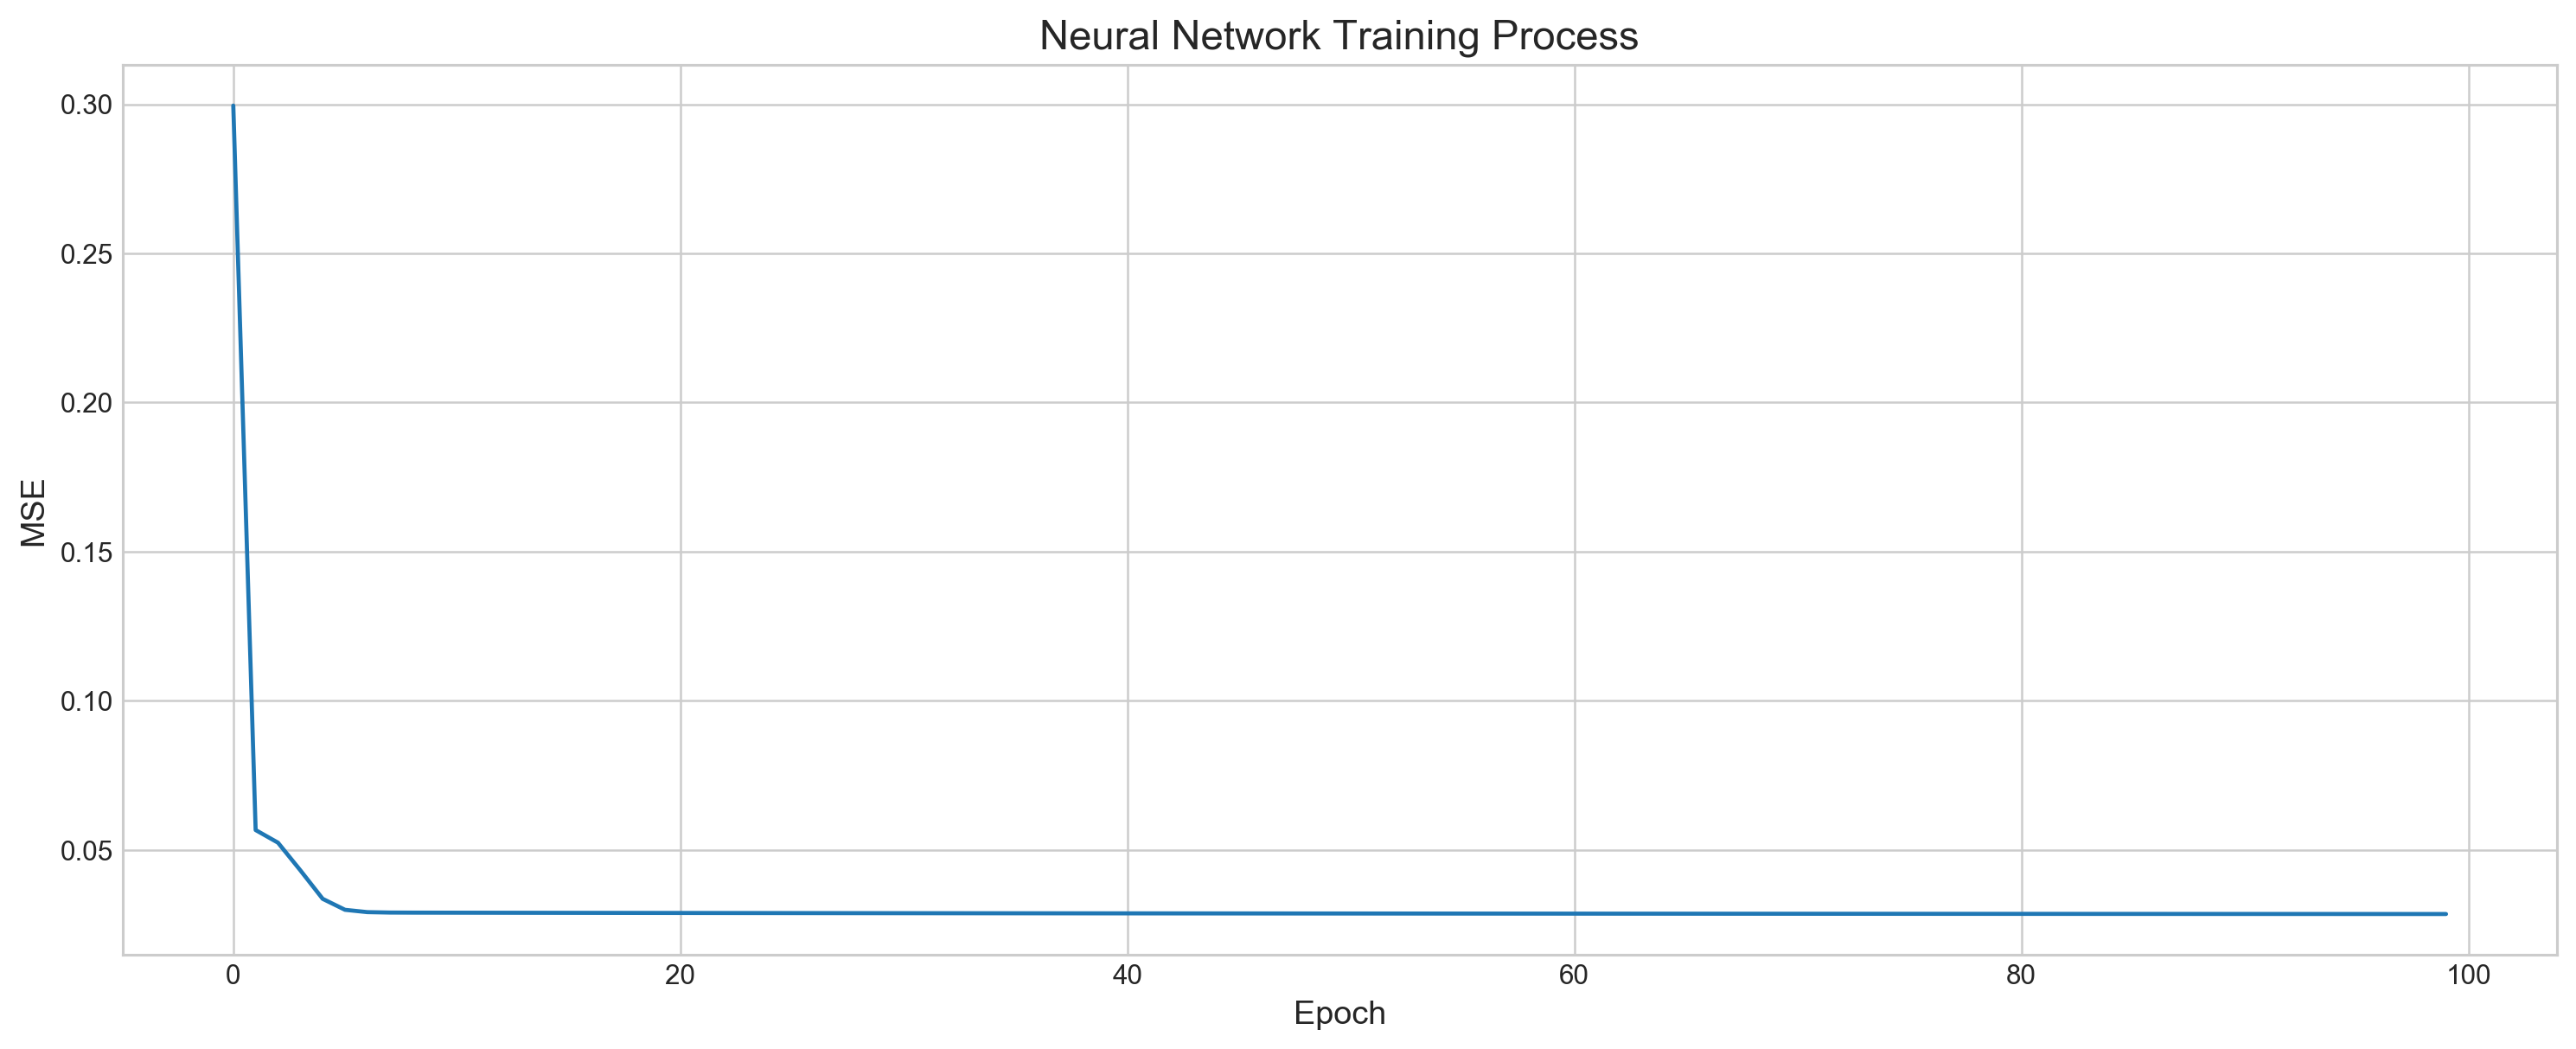

In [8]:
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16, 6)
plt.style.use('seaborn-whitegrid')
plt.plot(history)
plt.title('Neural Network Training Process', fontSize=15)
plt.xlabel('Epoch', fontSize=12)
plt.ylabel('MSE', fontSize=12)
plt.show()

In [9]:
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
mse

0.028357368457188573

## 3. Keras Neural Network

In [11]:
keras.backend.clear_session()

keras_model = keras.Sequential()
keras_model.add(keras.layers.Input((2,)))
keras_model.add(keras.layers.Dense(3, activation='sigmoid', use_bias=True))
keras_model.add(keras.layers.Dense(1, activation='sigmoid', use_bias=True))

keras_model.compile(loss='mse')

In [12]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [13]:
history_keras = keras_model.fit(X_train, y_train, epochs=100, verbose=0)

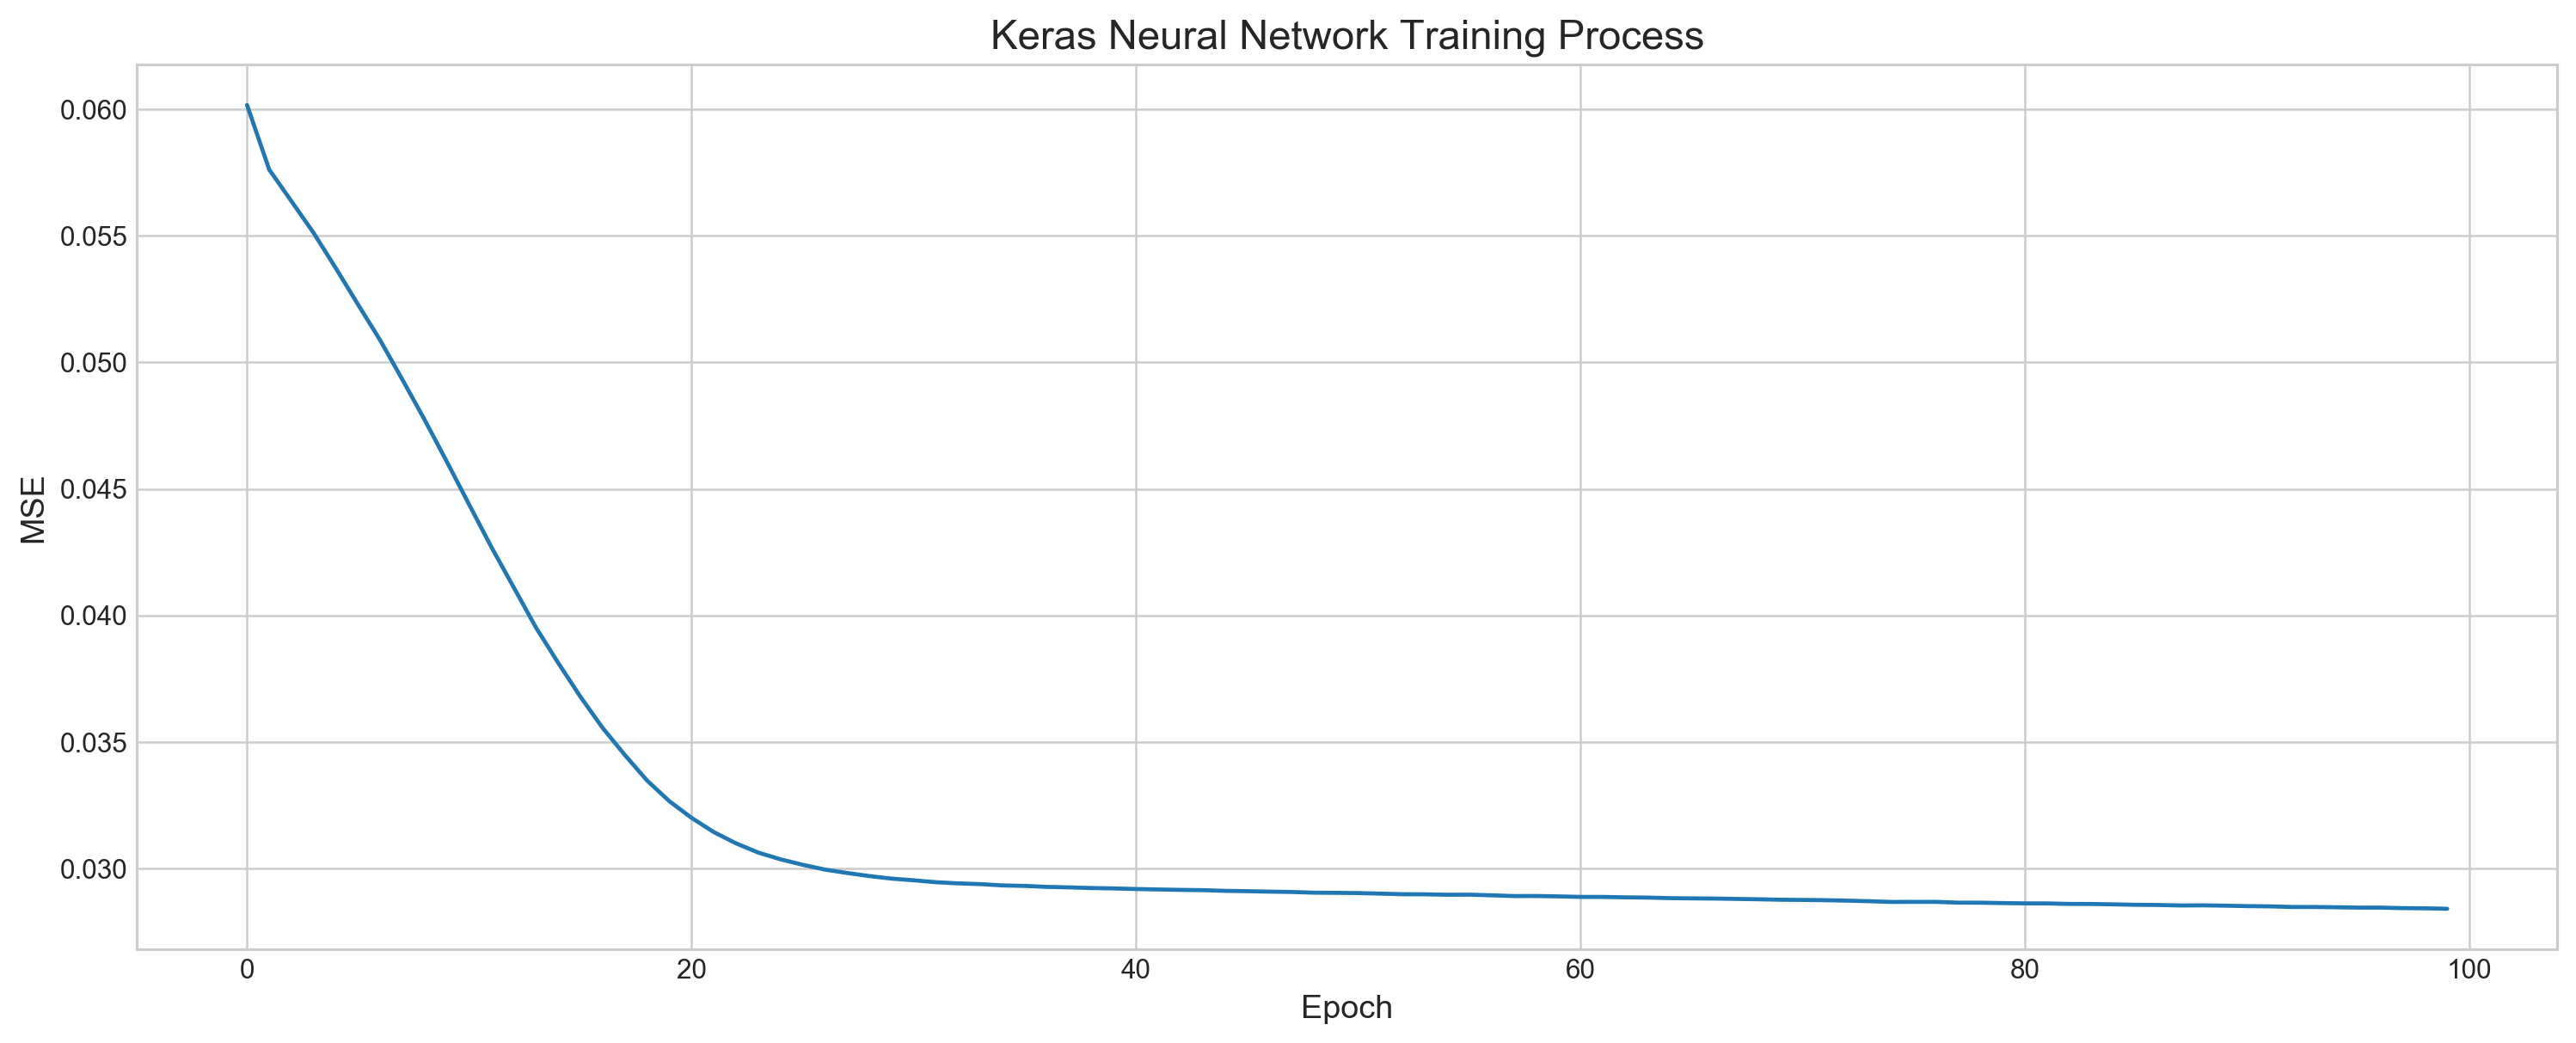

In [14]:
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16, 6)
plt.style.use('seaborn-whitegrid')
plt.plot(history_keras.history['loss'])
plt.title('Keras Neural Network Training Process', fontSize=15)
plt.xlabel('Epoch', fontSize=12)
plt.ylabel('MSE', fontSize=12)
plt.show()

In [15]:
y_pred_keras = keras_model.predict(X_test)

In [16]:
mse_keras = mean_squared_error(y_test, keras_model.predict(X_test))
mse_keras

0.028092162461256922

## 3. Comparing Our Neural Network with Keras

In [17]:
print("MSE Simple:", round(mse, 3))
print("MSE Keras: ", round(mse_keras, 3))

MSE Simple: 0.028
MSE Keras:  0.028


In [18]:
print("R-squared Simple:", round(r2_score(y_test, y_pred), 3))
print("R-squared Keras: ", round(r2_score(y_test, y_pred_keras), 3))

R-squared Simple: 0.497
R-squared Keras:  0.502


## Conclusion

Our neural network was able to predict with similar accuracy as Keras version.

## Next Steps

There are plenty of things we can do with our neural network, such as:
- rewrite feedforward and backpropagation to the matrix form
- add layers and neurons
- use different activation functions